Re-create the following figure using the `mpg` data set.

<img src="figs/example.png" style="width: 600px;" />

Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`

In [1]:
library('tidyverse')
library('tidyr')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
mpg |> head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [18]:
mpg_m = mpg |> 
        group_by(class) |> 
        summarize(cty = mean(cty)) |> 
        ungroup() |>
        arrange(cty) |> 
        mutate(class = fct_inorder(class))
mpg_m |> tail()

class,cty
<fct>,<dbl>
suv,13.50000
2seater,15.40000
minivan,15.81818
midsize,18.75610
compact,20.12766
subcompact,20.37143


In [14]:
mpg2 = mpg |> 
        mutate(class = fct_reorder(class, cty, .fun = median))

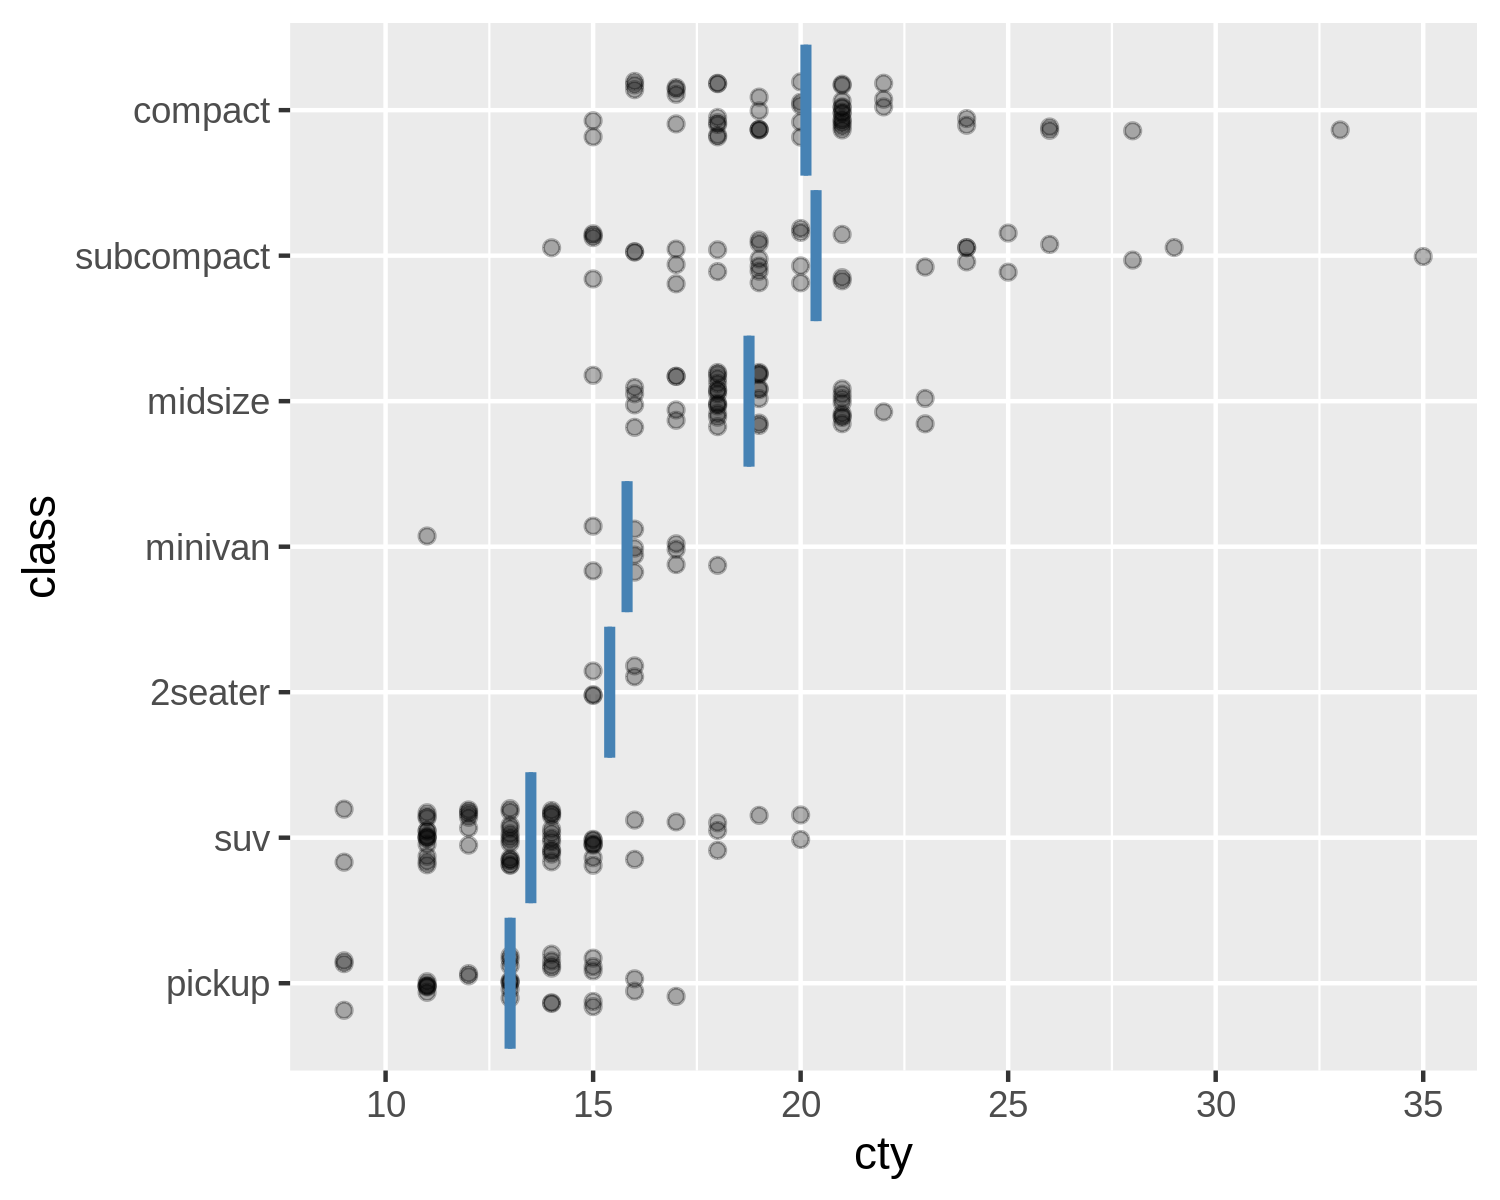

In [15]:
p = ggplot(mpg2, aes(x = cty, y = class)) + geom_point(position = position_jitter(height = 0.2, width = 0), 
                                                      alpha = 0.3, size = 1.5) + 
    geom_crossbar(color = 'steelblue', 
                  data = mpg_m, mapping = aes(xmin = cty, xmax = cty))
p
